In [1]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import QuantileTransformer, PowerTransformer, Normalizer, MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('Toddler Autism dataset.csv')
data = data.drop(columns=['Case_No'])

In [3]:
data.isna().sum()

,0
A1,0
A2,0
A3,0
A4,0
A5,0
A6,0
A7,0
A8,0
A9,0
A10,0


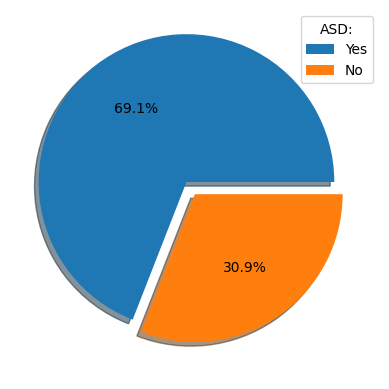

In [4]:
labels = ["Yes", "No"]
myexplode = [0.1, 0]
plt.pie(data.groupby('Class/ASD Traits ').size().reindex(labels),explode = myexplode, shadow = True,autopct='%1.1f%%')
plt.legend(title = "ASD:",labels = labels)
plt.show()

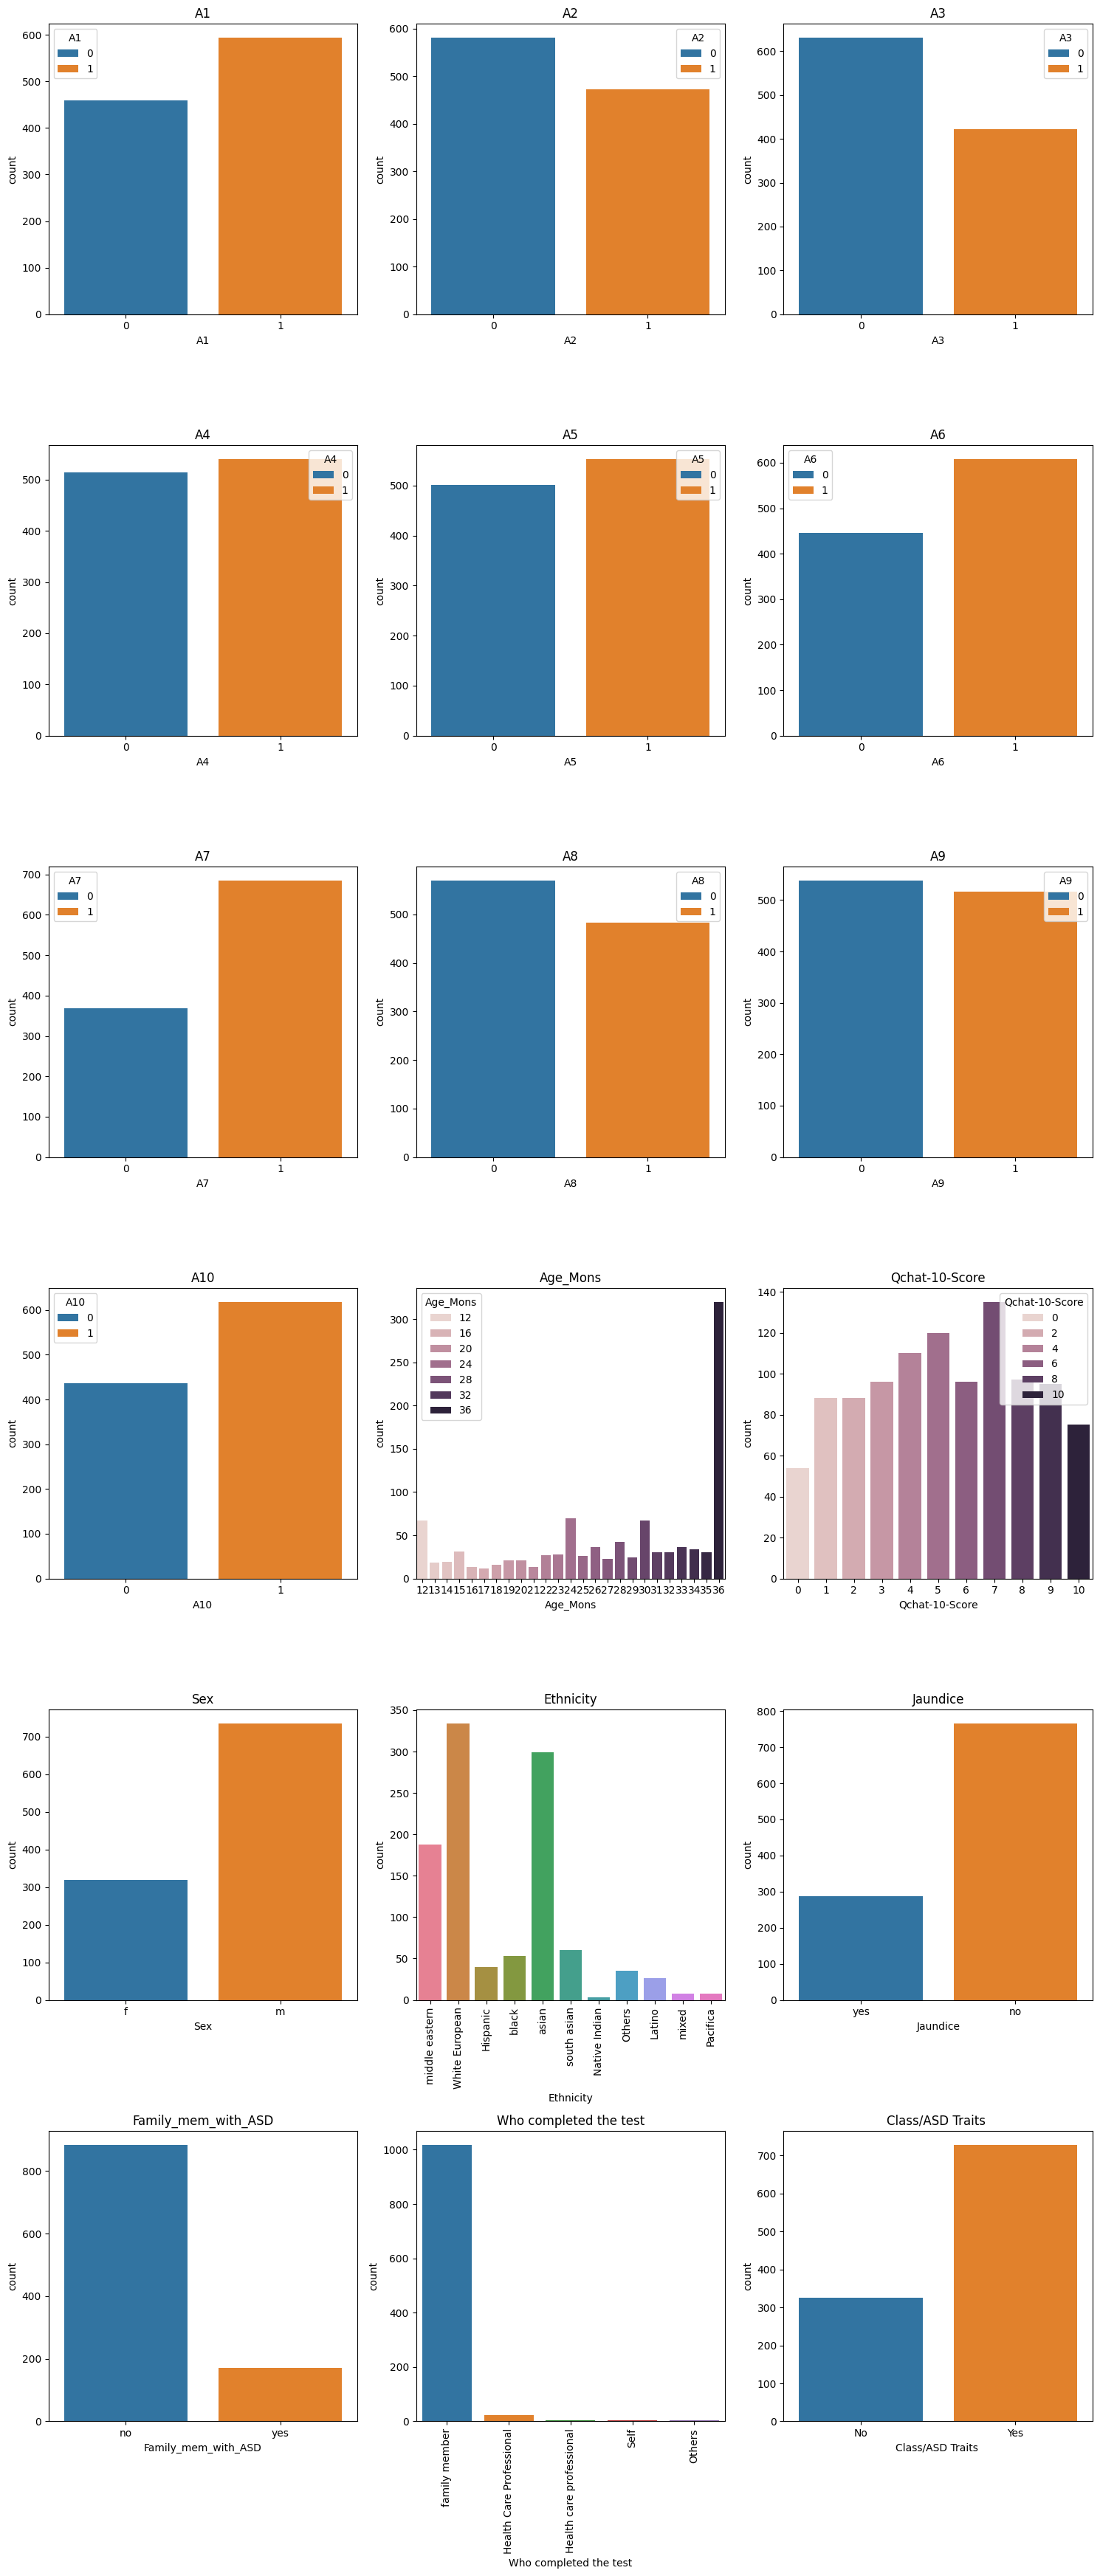

In [5]:
# Countplot for each feature
fig,axes=plt.subplots(6,3,figsize=(15,35))
axes=axes.ravel()
for i , col in enumerate(data.iloc[:,:]):
    sns.countplot(x=data[col],hue=data[col] ,ax=axes[i])
    axes[i].set_title(col)
    if col == "Who completed the test" or col == "Ethnicity" or col == "Age Months":
        axes[i].tick_params(axis="x", labelrotation=90)
plt.tight_layout()
plt.show()

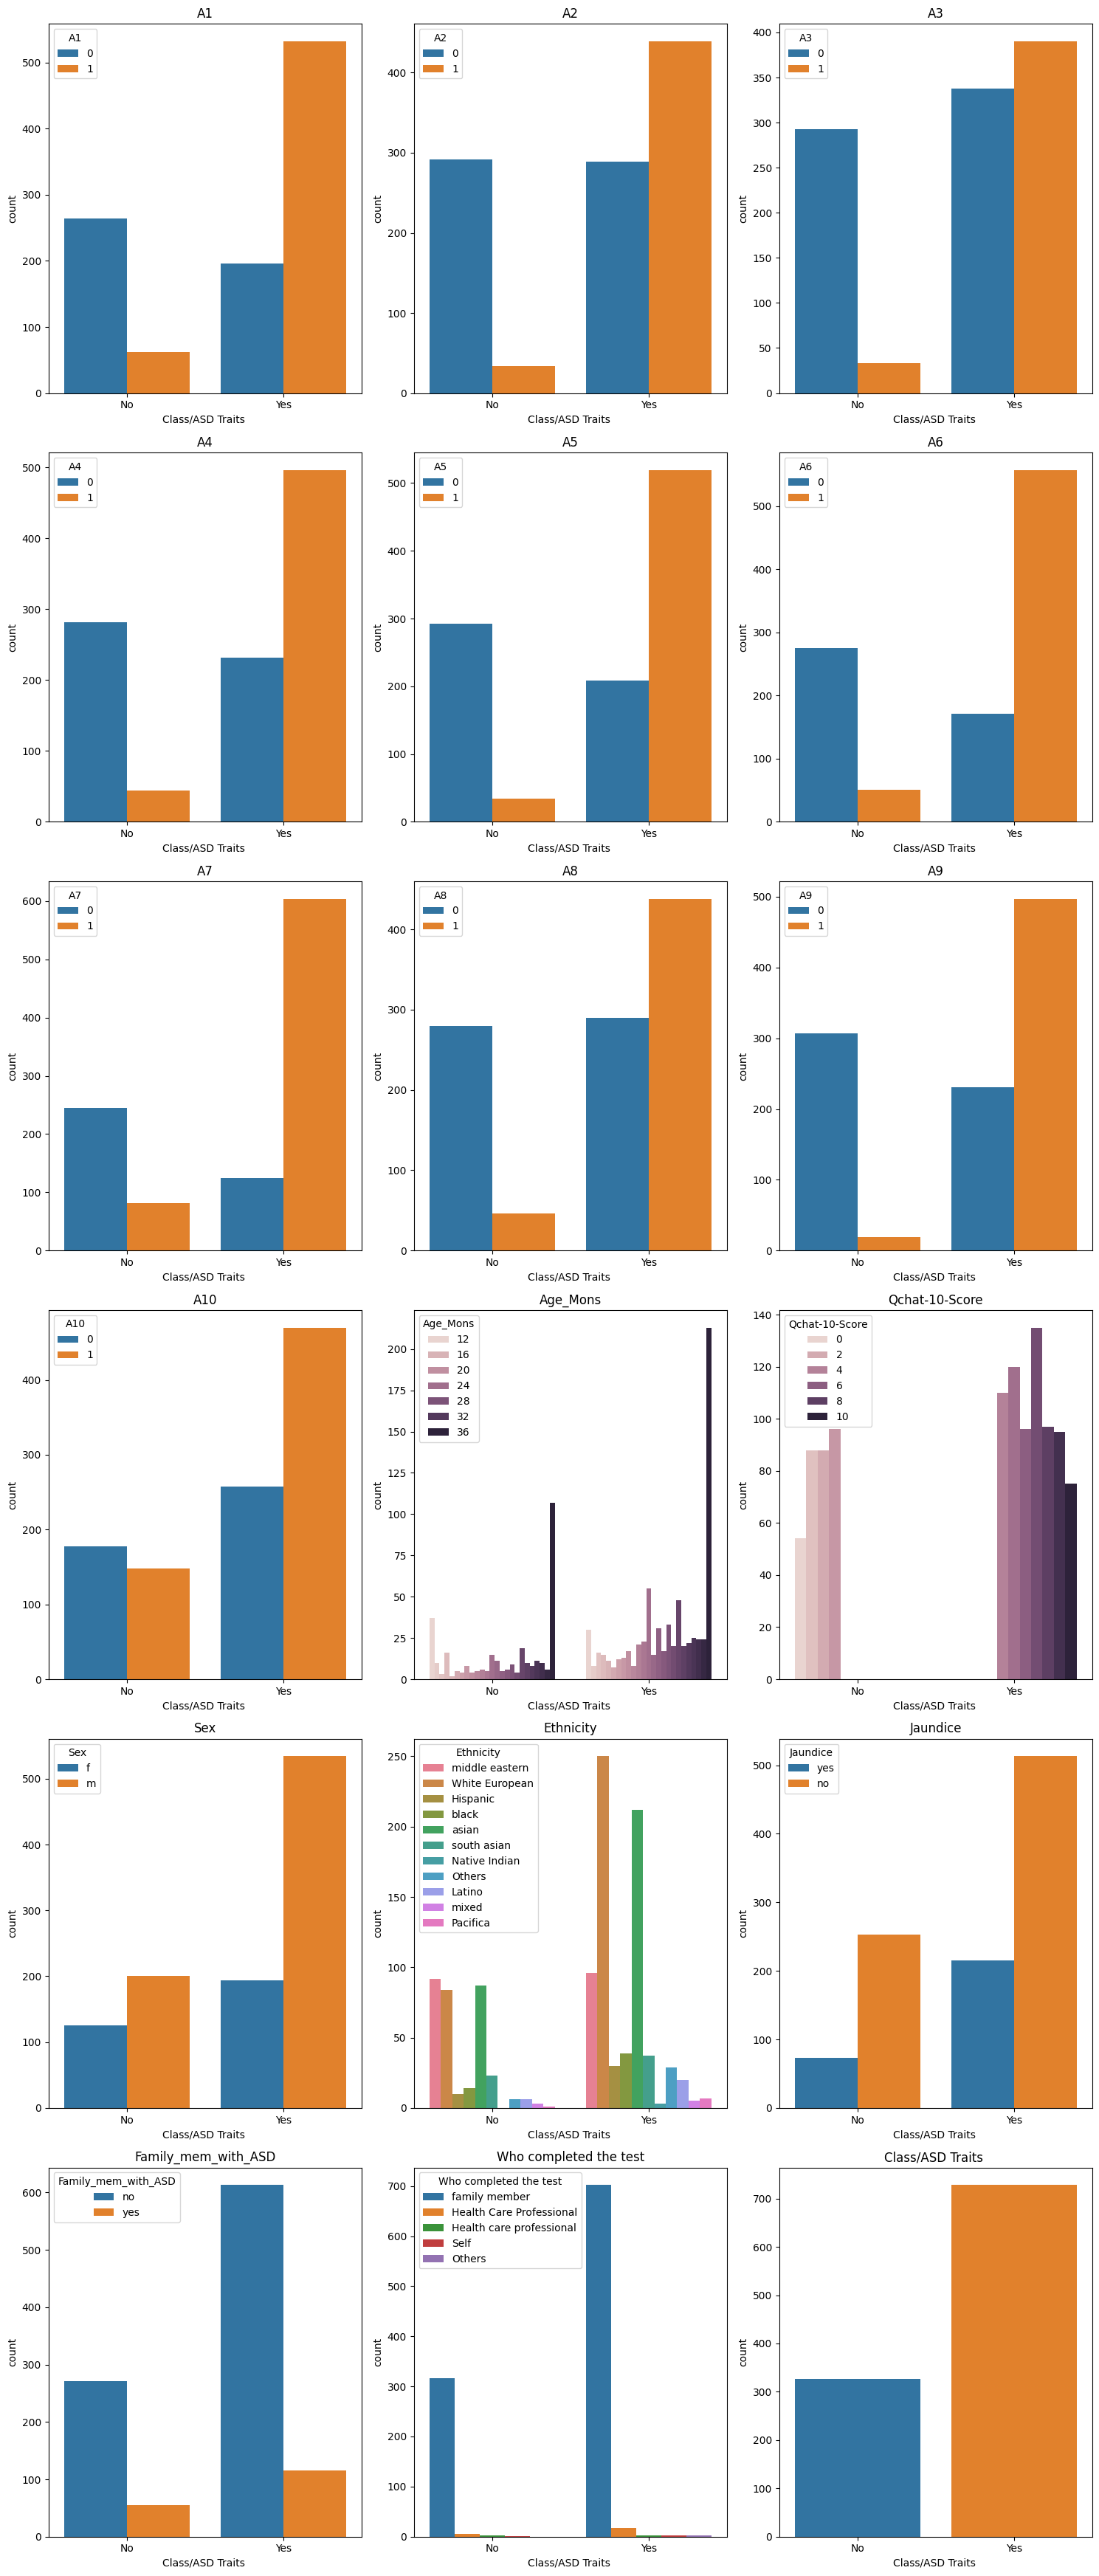

In [ ]:
fig, axes = plt.subplots(6, 3, figsize=(15, 35))
axes = axes.ravel()
for i, col in enumerate(data.iloc[:, :]):
    sns.countplot(x=data["Class/ASD Traits "], hue=data[col], ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

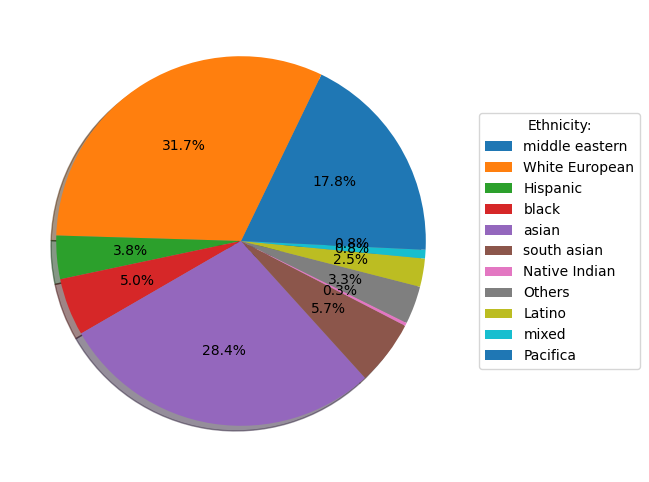

In [6]:
labels = ['middle eastern', 'White European', 'Hispanic', 'black', 'asian',
       'south asian', 'Native Indian', 'Others', 'Latino', 'mixed',
       'Pacifica']
plt.figure(figsize=(10, 6))
plt.pie(data.groupby('Ethnicity').size().reindex(labels), shadow = True,autopct='%1.1f%%')
plt.legend(title = "Ethnicity:",labels = labels,loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

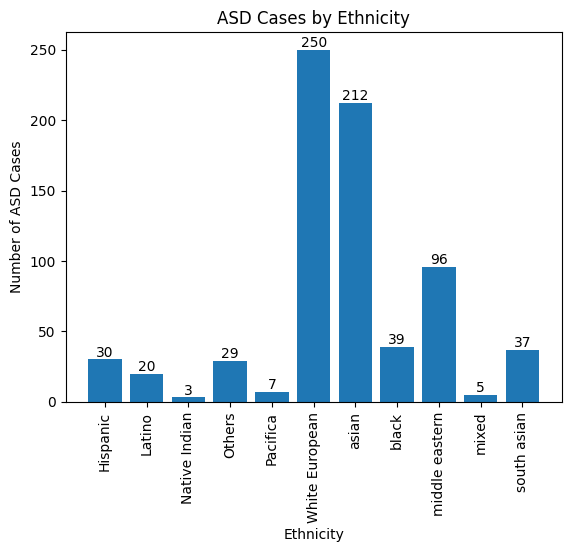

In [7]:
asd_counts_ethnicity = data[data['Class/ASD Traits '] == 'Yes'].groupby('Ethnicity').size()
bars=plt.bar(asd_counts_ethnicity.index, asd_counts_ethnicity.values)
plt.xlabel('Ethnicity')
plt.ylabel('Number of ASD Cases')
plt.title('ASD Cases by Ethnicity')
plt.xticks(rotation=90)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()

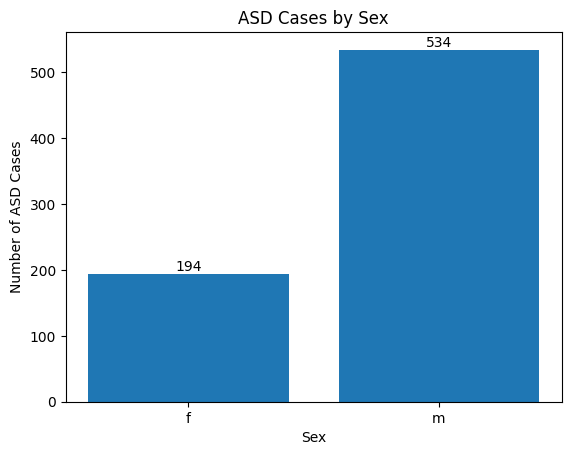

In [8]:
asd_counts_sex = data[data['Class/ASD Traits '] == 'Yes'].groupby('Sex').size()
bars=plt.bar(asd_counts_sex.index, asd_counts_sex.values)
plt.xlabel('Sex')
plt.ylabel('Number of ASD Cases')
plt.title('ASD Cases by Sex')
plt.xticks()
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()

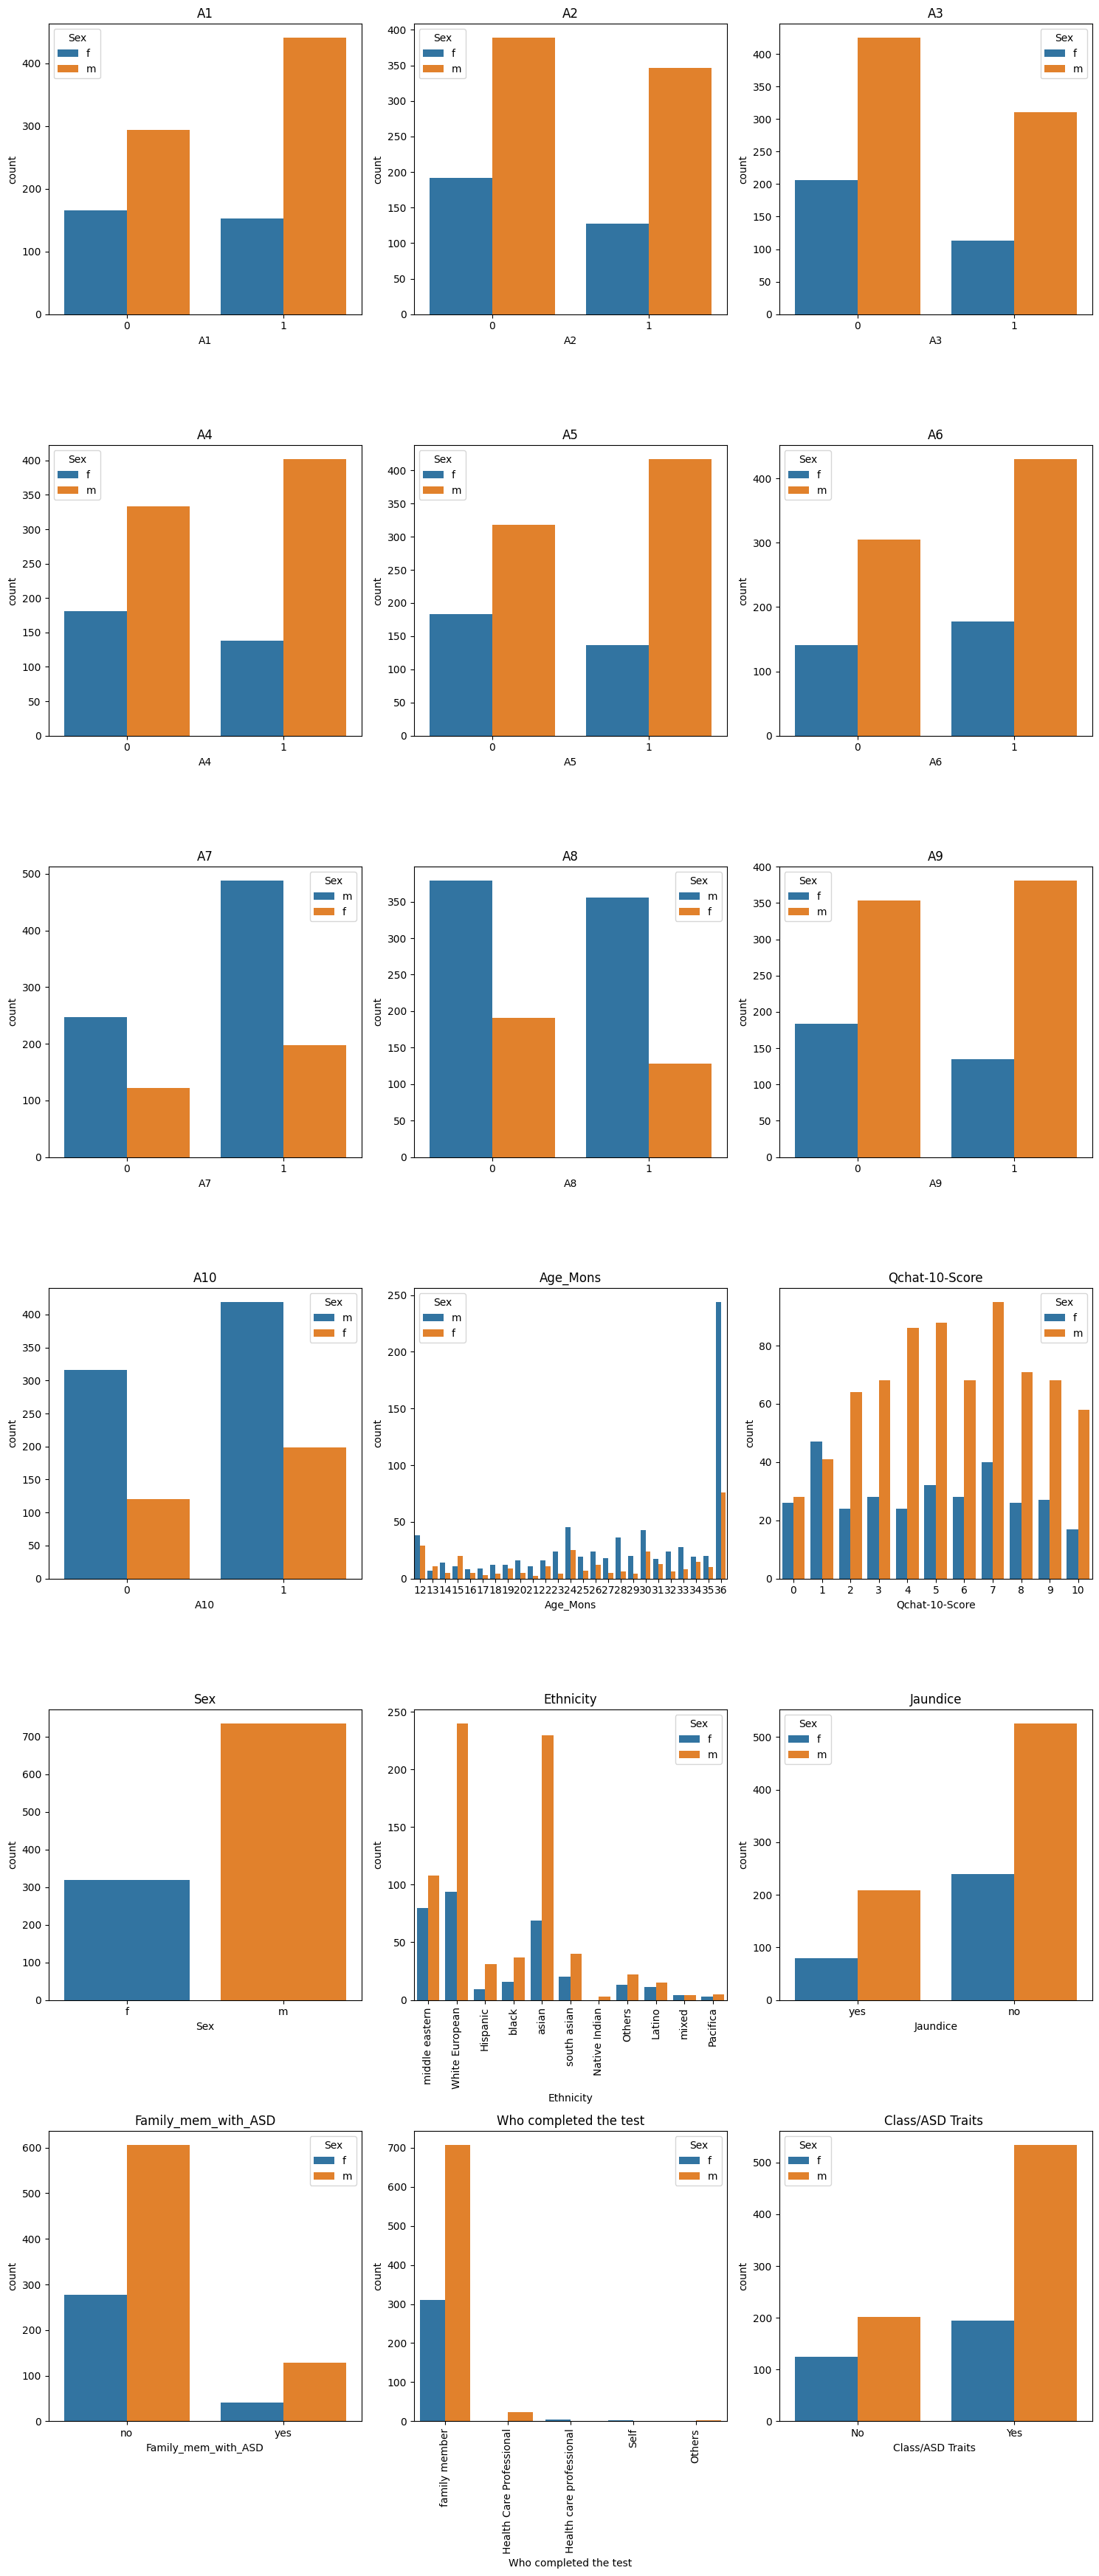

In [9]:
fig, axes = plt.subplots(6, 3, figsize=(15, 35))
axes = axes.ravel()
for i, col in enumerate(data.iloc[:, :]):
    sns.countplot(hue=data["Sex"], x=data[col], ax=axes[i])
    axes[i].set_title(col)
    if col == "Who completed the test" or col == "Ethnicity" or col == "Age Months":
        axes[i].tick_params(axis="x", labelrotation=90)
plt.tight_layout()
plt.show()

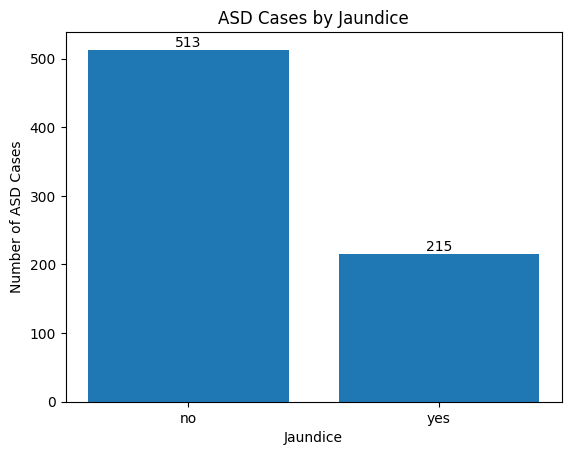

In [10]:
# Toddlers who have ASD and then they have Jaundice
asd_counts_jaundice = data[data['Class/ASD Traits '] == 'Yes'].groupby('Jaundice').size()
bars=plt.bar(asd_counts_jaundice.index, asd_counts_jaundice.values)
plt.xlabel('Jaundice')
plt.ylabel('Number of ASD Cases')
plt.title('ASD Cases by Jaundice')
plt.xticks()
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()

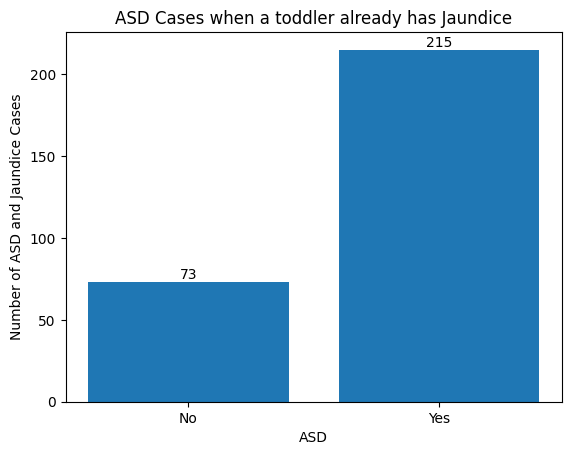

In [11]:
asd_counts_jaundice = data[data['Jaundice']=='yes'].groupby('Class/ASD Traits ').size()
bars=plt.bar(asd_counts_jaundice.index, asd_counts_jaundice.values)
plt.xlabel('ASD')
plt.ylabel('Number of ASD and Jaundice Cases')
plt.title('ASD Cases when a toddler already has Jaundice')
plt.xticks()
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()

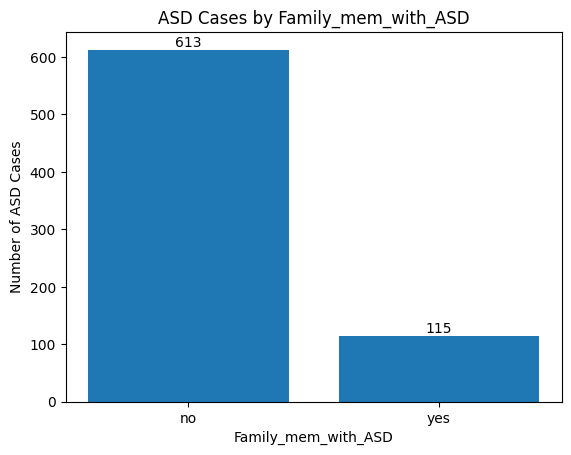

In [12]:
asd_counts = data[data['Class/ASD Traits '] == 'Yes'].groupby('Family_mem_with_ASD').size()
bars=plt.bar(asd_counts.index, asd_counts.values)
plt.xlabel('Family_mem_with_ASD')
plt.ylabel('Number of ASD Cases')
plt.title('ASD Cases by Family_mem_with_ASD')
plt.xticks()
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()

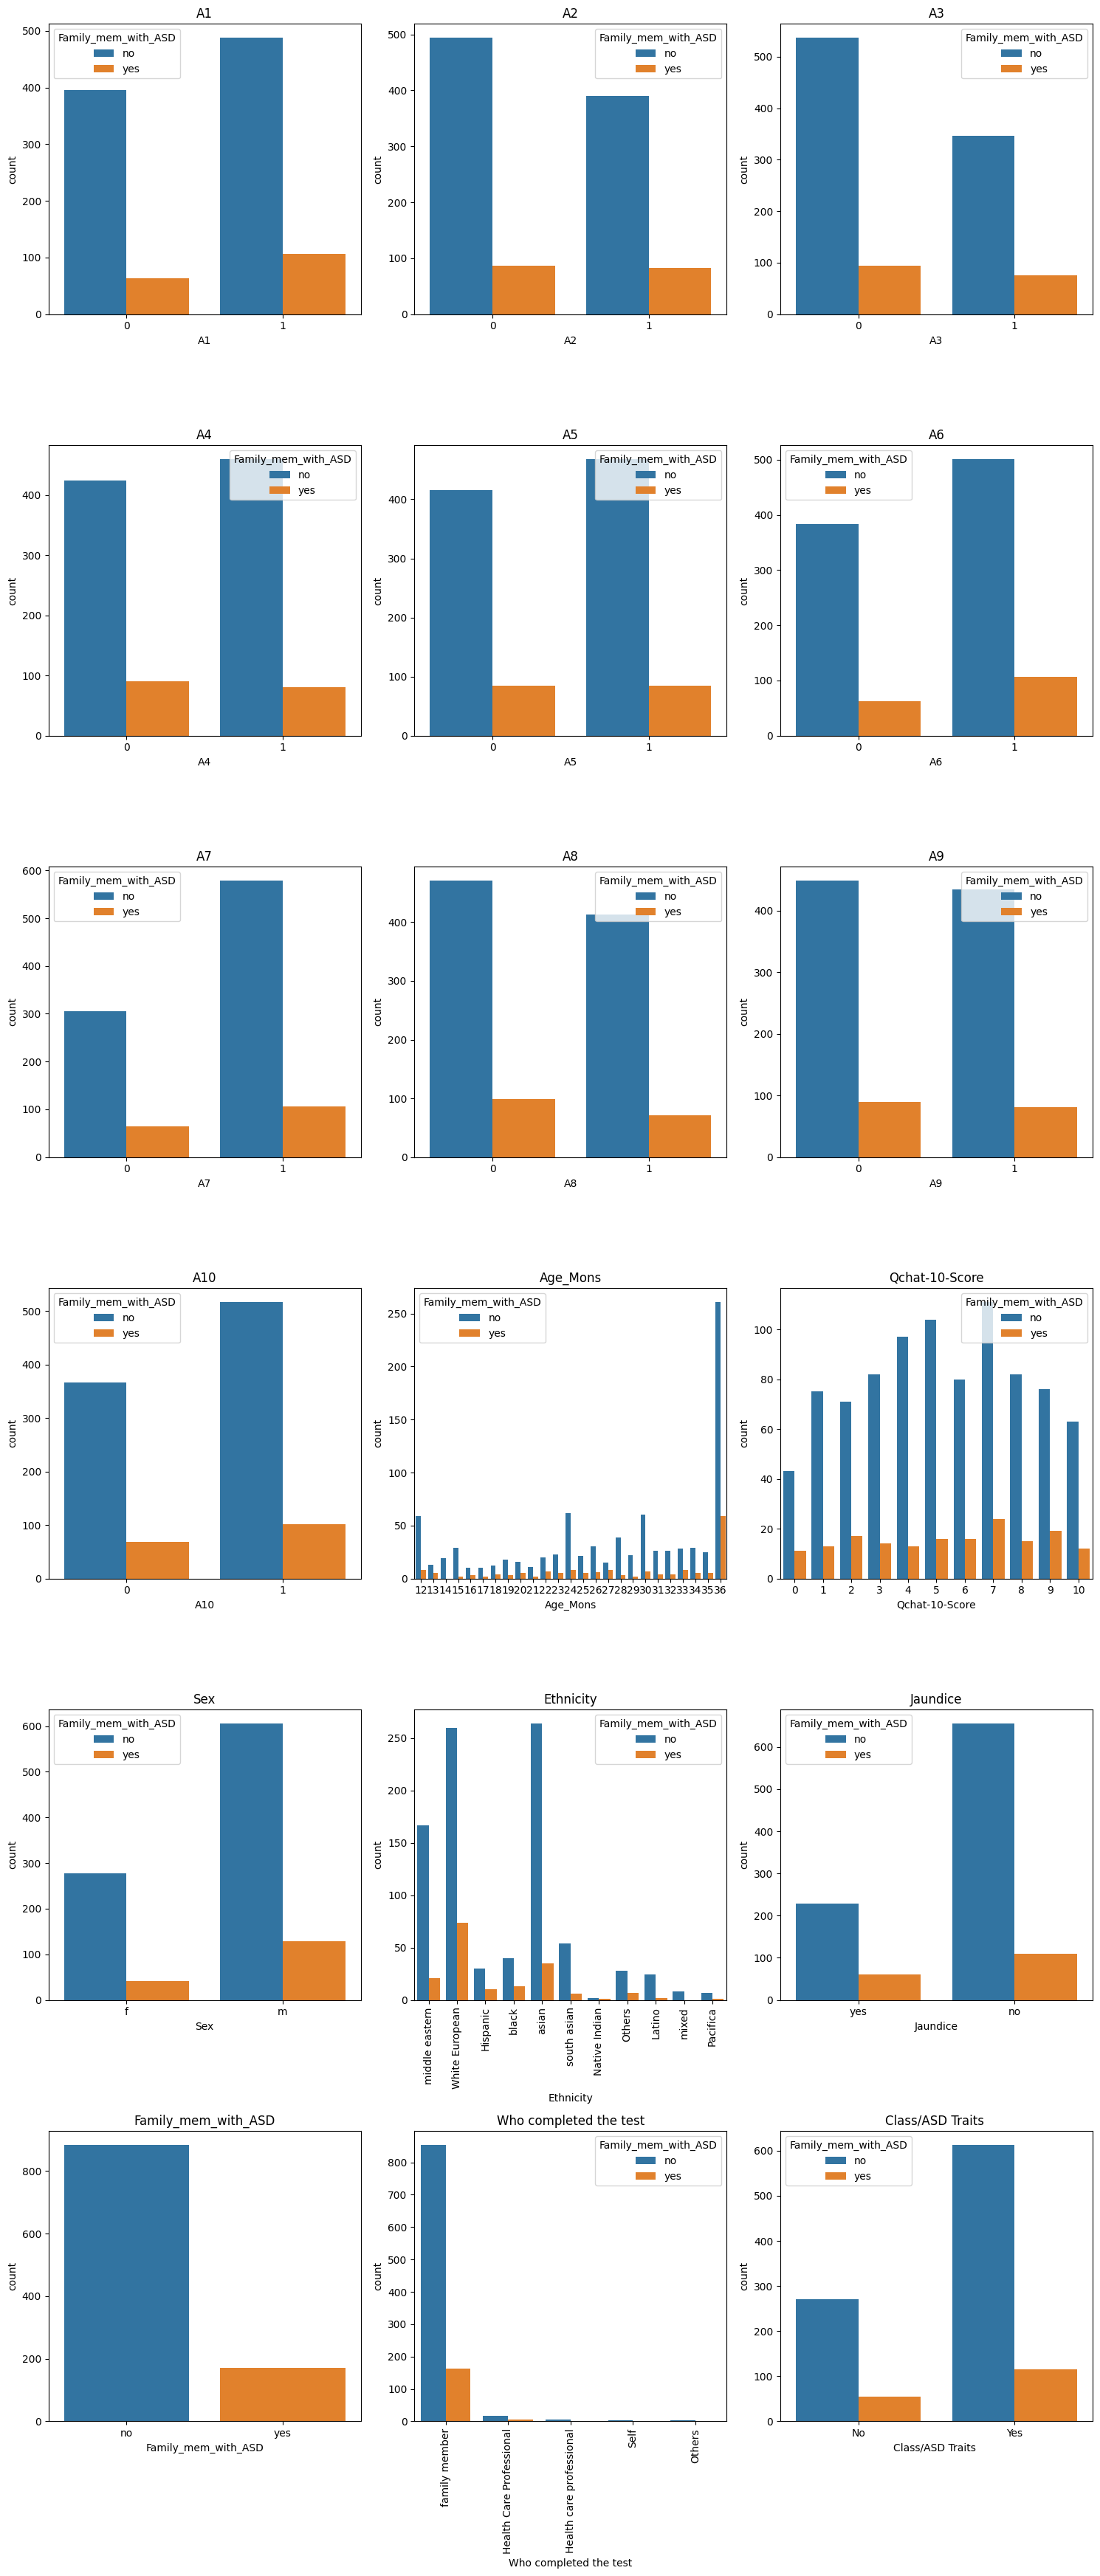

In [13]:
fig, axes = plt.subplots(6, 3, figsize=(15, 35))
axes = axes.ravel()
for i, col in enumerate(data.iloc[:, :]):
    sns.countplot(hue=data["Family_mem_with_ASD"], x=data[col], ax=axes[i])
    axes[i].set_title(col)
    if col == "Who completed the test" or col == "Ethnicity" or col == "Age Months":
        axes[i].tick_params(axis="x", labelrotation=90)
plt.tight_layout()
plt.show()

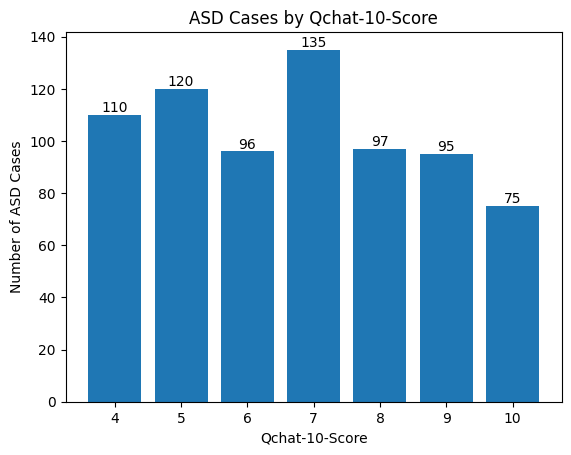

In [14]:
asd_counts = data[data['Class/ASD Traits '] == 'Yes'].groupby('Qchat-10-Score').size()
bars=plt.bar(asd_counts.index, asd_counts.values)
plt.xlabel('Qchat-10-Score')
plt.ylabel('Number of ASD Cases')
plt.title('ASD Cases by Qchat-10-Score')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.xticks()
plt.show()

In [ ]:
data = data.drop(columns=['Who completed the test'])

In [ ]:
# Select the numerical columns for transformation
numerical_columns = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons', 'Qchat-10-Score']
numerical_data = data[numerical_columns]

# Apply Quantile Transformer
quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=0)
quantile_transformed_data = quantile_transformer.fit_transform(numerical_data)

# Apply Power Transformer
power_transformer = PowerTransformer()
power_transformed_data = power_transformer.fit_transform(numerical_data)

# Apply Normalizer
normalizer = Normalizer()
normalized_data = normalizer.fit_transform(numerical_data)

# Apply Max Abs Scaler
max_abs_scaler = MaxAbsScaler()
max_abs_scaled_data = max_abs_scaler.fit_transform(numerical_data)

# Create DataFrames to store the transformed data
quantile_transformed_df = pd.DataFrame(quantile_transformed_data, columns=numerical_columns)
power_transformed_df = pd.DataFrame(power_transformed_data, columns=numerical_columns)
normalized_df = pd.DataFrame(normalized_data, columns=numerical_columns)
max_abs_scaled_df = pd.DataFrame(max_abs_scaled_data, columns=numerical_columns)

In [ ]:
#print(quantile_transformed_df.head(), power_transformed_df.head(), normalized_df.head(), max_abs_scaled_df.head())

# Select relevant columns and target variable
X = data.drop(columns=['Class/ASD Traits '])
y = data['Class/ASD Traits ']

# Convert target variable to binary
y = y.apply(lambda x: 1 if x == 'Yes' else 0)

# Select the categorical columns (excluding the numerical columns)
categorical_columns = X.columns.difference(numerical_columns)

# Extract the categorical data
categorical_data = X[categorical_columns]

In [ ]:
# Quantile Transformed Data
X_quantile = pd.concat([categorical_data.reset_index(drop=True), quantile_transformed_df.reset_index(drop=True)], axis=1)
X_quantile = pd.get_dummies(X_quantile, columns=['Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD'], drop_first=False)

# Power Transformed Data
X_power = pd.concat([categorical_data.reset_index(drop=True), power_transformed_df.reset_index(drop=True)], axis=1)
X_power = pd.get_dummies(X_power, columns=['Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD'], drop_first=False)

print(normalized_df.columns)

# Normalized Data
X_normalized = pd.concat([categorical_data.reset_index(drop=True), normalized_df.reset_index(drop=True)], axis=1)
#print(X_normalized.columns)
X_normalized = pd.get_dummies(X_normalized, columns=['Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD'], drop_first=False)
#print(X_normalized.columns)

# Max Abs Scaled Data
X_max_abs = pd.concat([categorical_data.reset_index(drop=True), max_abs_scaled_df.reset_index(drop=True)], axis=1)
X_max_abs = pd.get_dummies(X_max_abs, columns=['Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD'], drop_first=False)

#print(X_quantile.head())
#print(X_power.head())
print(X_normalized.head())
#print(X_max_abs.head())

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Qchat-10-Score'],
      dtype='object')
         A1        A2       A3        A4        A5        A6        A7  \
0  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000  0.035444   
1  0.027566  0.027566  0.00000  0.000000  0.000000  0.027566  0.027566   
2  0.027566  0.000000  0.00000  0.000000  0.000000  0.000000  0.027566   
3  0.038180  0.038180  0.03818  0.038180  0.038180  0.038180  0.038180   
4  0.045175  0.045175  0.00000  0.045175  0.045175  0.045175  0.045175   

         A8        A9       A10  ...  Ethnicity_White European  \
0  0.035444  0.000000  0.035444  ...                     False   
1  0.000000  0.000000  0.000000  ...                      True   
2  0.027566  0.000000  0.027566  ...                     False   
3  0.038180  0.038180  0.038180  ...                     False   
4  0.045175  0.045175  0.045175  ...                      True   

   Ethnicity_asian  Ethnicity_

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3,shuffle=True,stratify=y)

def clf_report(y_test,y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  print(f'Accuracy: {accuracy * 100:.2f}%')
  print(f'Precision: {precision * 100:.2f}%')
  print(f'Recall: {recall * 100:.2f}%')
  print(f'F1-score: {f1 * 100:.2f}%')

bagging_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging_clf.fit(X_train, y_train)

# Predictions
y_pred = bagging_clf.predict(X_test)
# Print metrics for Random Forest
print("Bagging Classifier Classification Report:")
print(classification_report(y_test, y_pred))
clf_report(y_test,y_pred)

"""
# Random Forest Classifier (Bagging)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
rf_preds = rf_clf.predict(X_test)

# Print metrics for Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_preds))
"""

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('svc', SVC(probability=True))
]

# Define the meta-model
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())
stacking_clf.fit(X_train, y_train)

y_pred_stacking = stacking_clf.predict(X_test)

print("Stacking Classification Report:")
print(classification_report(y_test, y_pred_stacking))
clf_report(y_test,y_pred_stacking)

# Define the base models
clf1 = RandomForestClassifier(n_estimators=50, random_state=42)
clf2 = SVC(probability=True)
clf3 = LogisticRegression()

# Voting Classifier
voting_clf = VotingClassifier(estimators=[('rf', clf1), ('svc', clf2), ('lr', clf3)], voting='soft')
voting_clf.fit(X_train, y_train)

y_pred_voting = voting_clf.predict(X_test)

print("Voting Classification Report:")
print(classification_report(y_test, y_pred_voting))
clf_report(y_test,y_pred_voting)

# Bagging with SVM
bagged_svm = BaggingClassifier(estimator=SVC(), n_estimators=10, random_state=42)
bagged_svm.fit(X_train, y_train)

y_pred_svmb = bagged_svm.predict(X_test)

print("Bagging with SVM Classification Report:")
print(classification_report(y_test, y_pred_svmb))
clf_report(y_test,y_pred_svmb)

# Extra Trees
extra_trees_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
extra_trees_clf.fit(X_train, y_train)

y_pred_et = extra_trees_clf.predict(X_test)

print("Extra Trees Classification Report:")
print(classification_report(y_test, y_pred_et))
clf_report(y_test,y_pred_et)

# Neural Network as base estimator in Bagging
bagged_nn = BaggingClassifier(
    estimator=MLPClassifier(hidden_layer_sizes=(100,), max_iter=500),
    n_estimators=10, random_state=42)
bagged_nn.fit(X_train, y_train)

y_pred_nn = bagged_nn.predict(X_test)

print("Bootstrap aggregated Neural networks Classification Report:")
print(classification_report(y_test, y_pred_nn))
clf_report(y_test,y_pred_nn)

catboost = CatBoostClassifier(n_estimators=100, learning_rate=0.1)
catboost.fit(X_train, y_train)

y_pred_catboost = catboost.predict(X_test)

print("CatBoost Classification Report:")
print(classification_report(y_test, y_pred_catboost))

clf_report(y_test,y_pred_catboost)

Bagging Classifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        98
           1       0.97      1.00      0.99       219

    accuracy                           0.98       317
   macro avg       0.99      0.97      0.98       317
weighted avg       0.98      0.98      0.98       317

Accuracy: 98.11%
Precision: 97.33%
Recall: 100.00%
F1-score: 98.65%
Stacking Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        98
           1       0.97      1.00      0.98       219

    accuracy                           0.98       317
   macro avg       0.98      0.96      0.97       317
weighted avg       0.98      0.98      0.98       317

Accuracy: 97.79%
Precision: 96.90%
Recall: 100.00%
F1-score: 98.43%
Voting Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.86      0.89        


Model Performance Metrics:
--------------------------------------------------
CatBoost                       Kappa: 0.947, AUC: 0.999
Bagging                        Kappa: 0.955, AUC: 0.999
Extra Trees                    Kappa: 0.940, AUC: 0.996
Stacking                       Kappa: 0.947, AUC: 0.994
Voting                         Kappa: 0.849, AUC: 0.984
Bagged Neural Network          Kappa: 0.792, AUC: 0.966
Bagged SVM                     Kappa: 0.429, AUC: 0.773


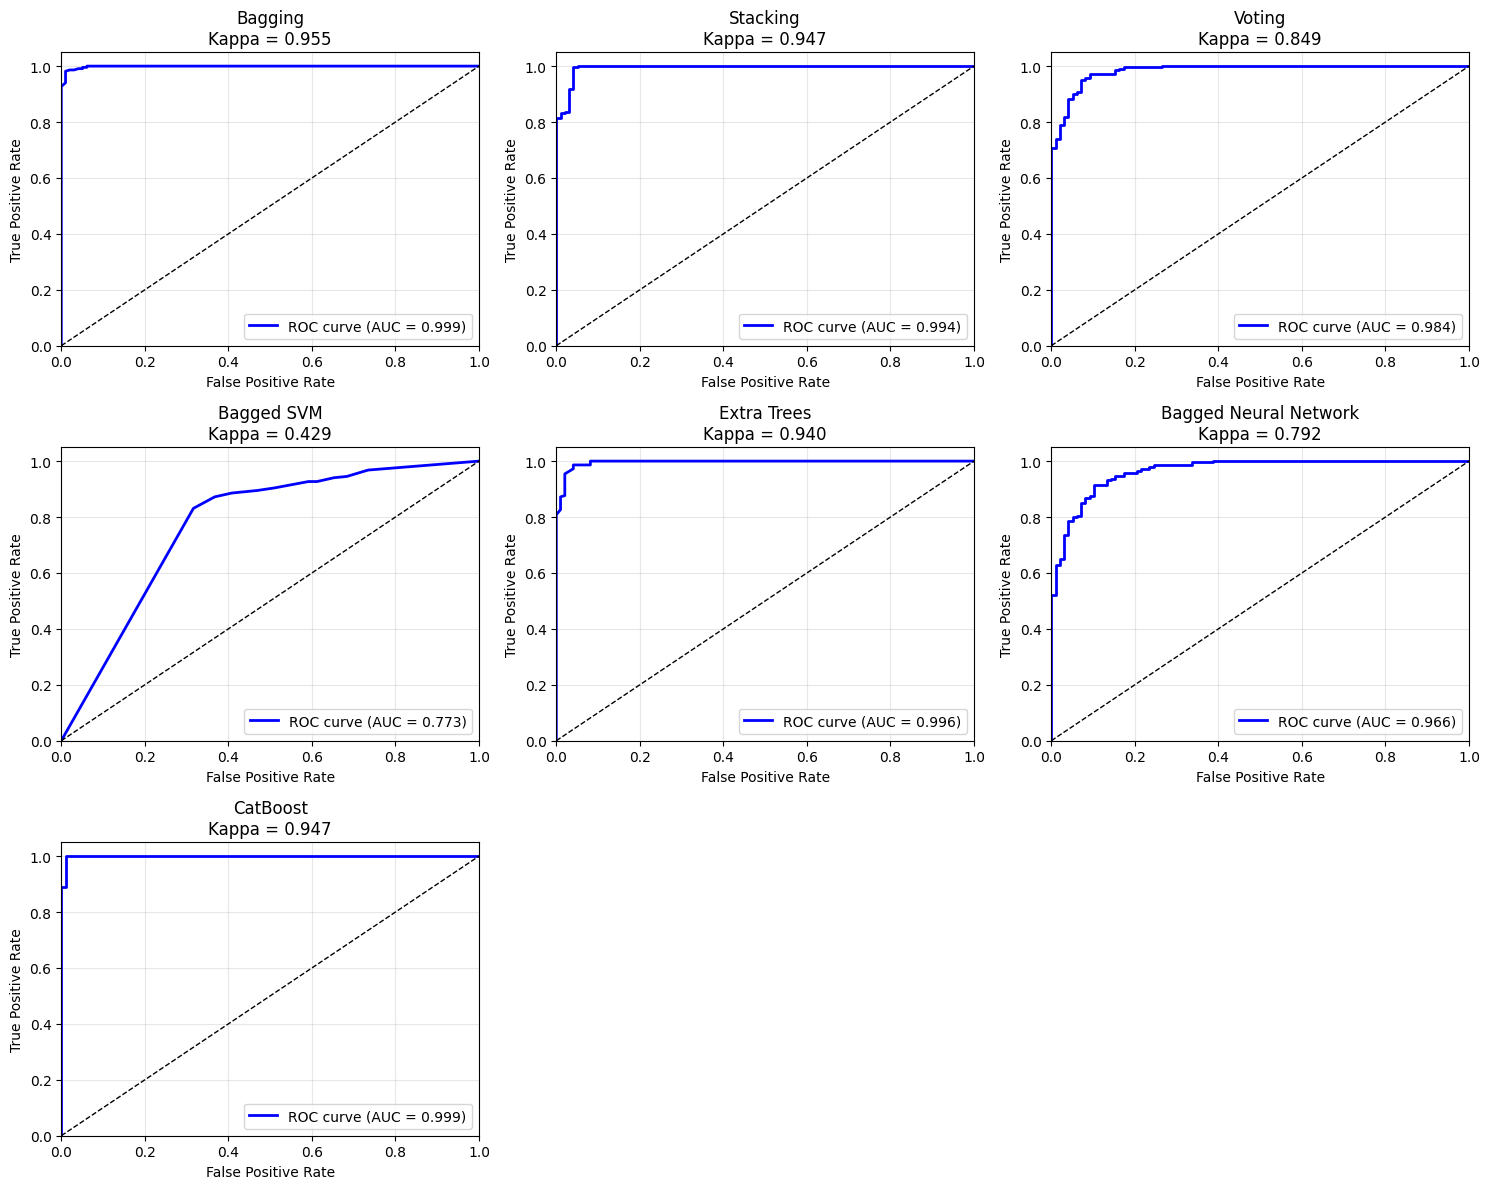

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import cohen_kappa_score

def plot_individual_roc_curves(classifiers, X_test, y_test):
    """
    Plot separate ROC curves for each classifier

    Parameters:
    classifiers (dict): Dictionary of classifier names and fitted classifier objects
    X_test: Test features
    y_test: True labels
    """
    # Calculate number of rows and columns for subplots
    n_models = len(classifiers)
    n_cols = 3  # You can adjust this number to change layout
    n_rows = (n_models + n_cols - 1) // n_cols

    # Create figure
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
    axes = axes.ravel()  # Flatten axes array

    metrics = []

    for idx, (name, clf) in enumerate(classifiers.items()):
        # Get predictions and probabilities
        y_pred = clf.predict(X_test)

        try:
            y_prob = clf.predict_proba(X_test)[:, 1]
            # Calculate ROC curve
            fpr, tpr, _ = roc_curve(y_test, y_prob)
            roc_auc = auc(fpr, tpr)
            kappa = cohen_kappa_score(y_test, y_pred)

            # Plot ROC curve
            axes[idx].plot(fpr, tpr, 'b-', lw=2,
                         label=f'ROC curve (AUC = {roc_auc:.3f})')
            axes[idx].plot([0, 1], [0, 1], 'k--', lw=1)
            axes[idx].set_xlim([0.0, 1.0])
            axes[idx].set_ylim([0.0, 1.05])
            axes[idx].set_xlabel('False Positive Rate')
            axes[idx].set_ylabel('True Positive Rate')
            axes[idx].set_title(f'{name}\nKappa = {kappa:.3f}')
            axes[idx].grid(True, alpha=0.3)
            axes[idx].legend(loc="lower right")

            metrics.append((name, roc_auc, kappa))

        except (AttributeError, IndexError):
            axes[idx].text(0.5, 0.5, 'No probability predictions available',
                         ha='center', va='center')
            axes[idx].set_title(name)

    # Remove empty subplots
    for idx in range(len(classifiers), len(axes)):
        fig.delaxes(axes[idx])

    # Print sorted metrics
    print("\nModel Performance Metrics:")
    print("-" * 50)
    metrics.sort(key=lambda x: x[1], reverse=True)
    for name, roc_auc, kappa in metrics:
        print(f"{name:30} Kappa: {kappa:.3f}, AUC: {roc_auc:.3f}")

    plt.tight_layout()
    return fig

# Create dictionary of your classifiers
classifiers = {
    'Bagging': bagging_clf,
    'Stacking': stacking_clf,
    'Voting': voting_clf,
    'Bagged SVM': bagged_svm,
    'Extra Trees': extra_trees_clf,
    'Bagged Neural Network': bagged_nn,
    'CatBoost': catboost
}

# Plot individual ROC curves
fig = plot_individual_roc_curves(classifiers, X_test, y_test)
plt.show()

0:	learn: 0.5918794	total: 1.2ms	remaining: 118ms
1:	learn: 0.5168758	total: 2.21ms	remaining: 109ms
2:	learn: 0.4641109	total: 3.15ms	remaining: 102ms
3:	learn: 0.4093657	total: 4.1ms	remaining: 98.4ms
4:	learn: 0.3687794	total: 5.04ms	remaining: 95.8ms
5:	learn: 0.3257142	total: 5.95ms	remaining: 93.2ms
6:	learn: 0.2909989	total: 6.88ms	remaining: 91.4ms
7:	learn: 0.2585500	total: 7.83ms	remaining: 90ms
8:	learn: 0.2263104	total: 8.76ms	remaining: 88.5ms
9:	learn: 0.2075756	total: 9.66ms	remaining: 87ms
10:	learn: 0.1901986	total: 10.6ms	remaining: 85.8ms
11:	learn: 0.1718755	total: 11.5ms	remaining: 84.5ms
12:	learn: 0.1593143	total: 12.4ms	remaining: 83.1ms
13:	learn: 0.1491378	total: 13.3ms	remaining: 81.9ms
14:	learn: 0.1393127	total: 14.2ms	remaining: 80.7ms
15:	learn: 0.1277693	total: 15.2ms	remaining: 79.6ms
16:	learn: 0.1224731	total: 16.1ms	remaining: 78.7ms
17:	learn: 0.1140652	total: 17.1ms	remaining: 77.8ms
18:	learn: 0.1096612	total: 18.1ms	remaining: 77ms
19:	learn: 0.1

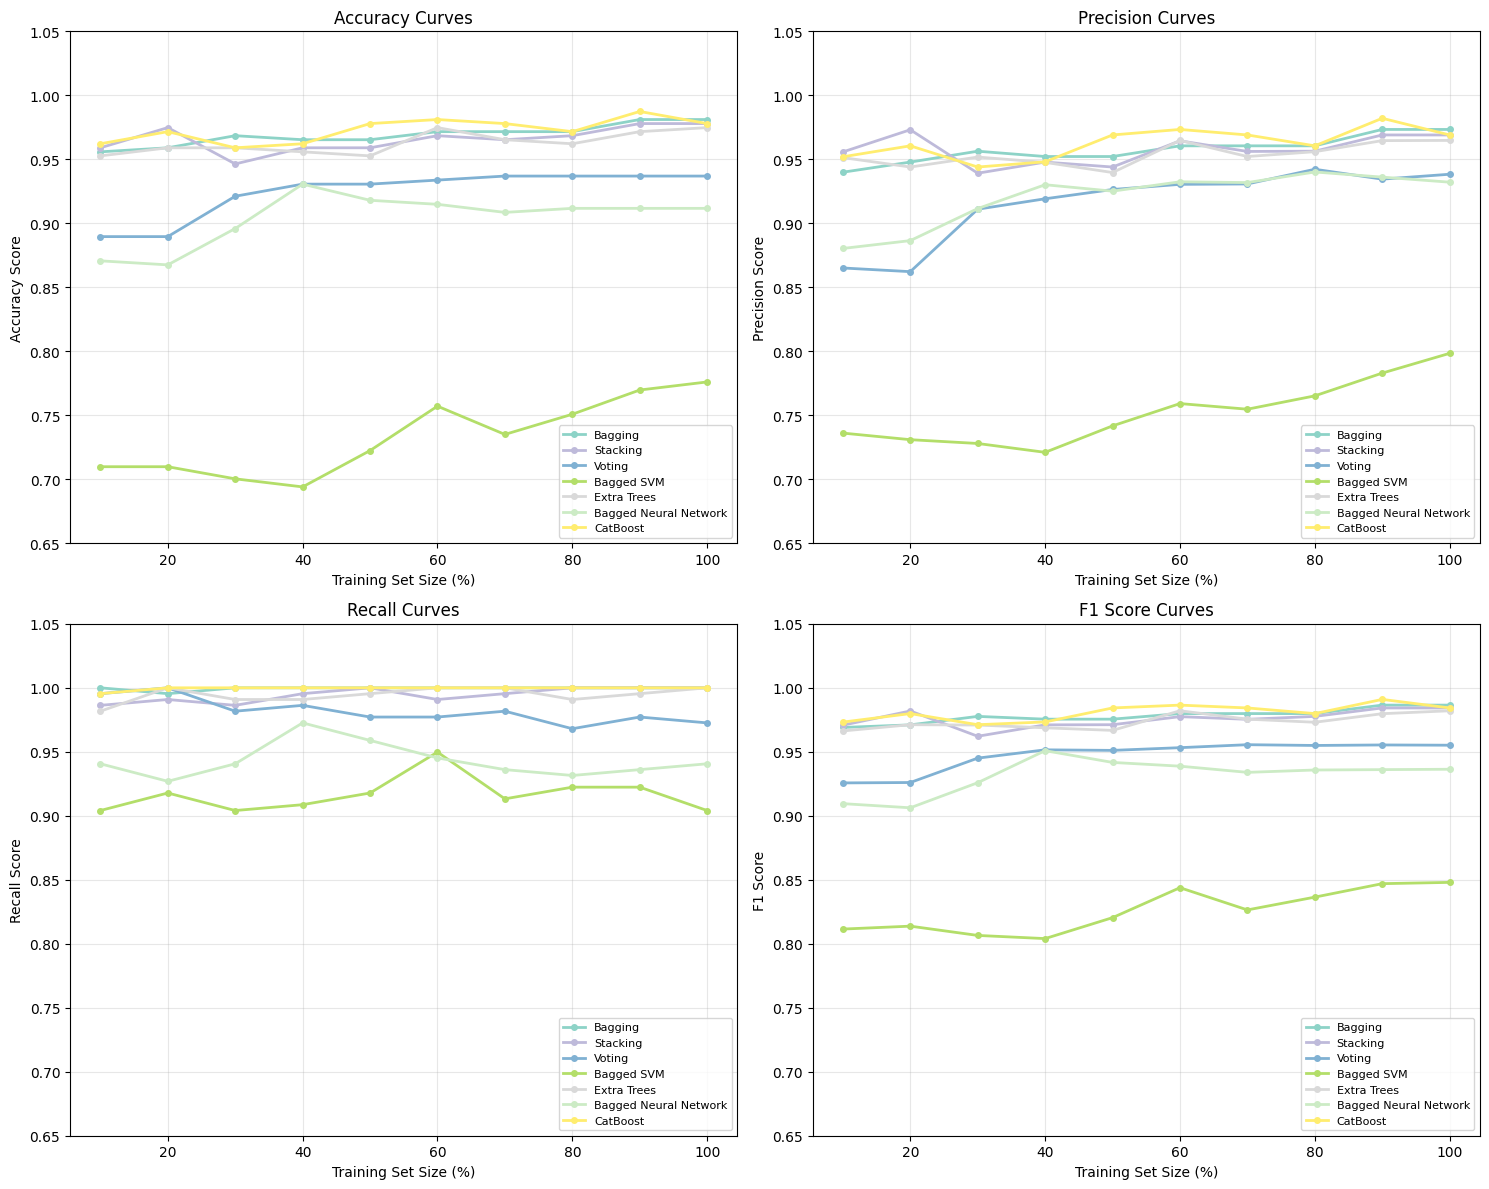

In [ ]:
from sklearn.base import clone

def plot_performance_curves(classifiers, X_train, X_test, y_train, y_test):
    """
    Plot performance curves (accuracy, precision, recall, f1) for all models
    """
    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.ravel()

    # Colors for different models
    colors = plt.cm.Set3(np.linspace(0, 1, len(classifiers)))

    # Training set sizes to evaluate (10% to 100%)
    train_sizes = np.linspace(0.1, 1.0, 10)

    # Store metrics for each model
    metrics = {name: {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}
              for name in classifiers.keys()}

    # Calculate metrics for different training sizes
    for train_size in train_sizes:
        # Calculate size of the training subset
        subset_size = int(len(X_train) * train_size)
        X_subset = X_train[:subset_size]
        y_subset = y_train[:subset_size]

        # Train and evaluate each model
        for (name, clf), color in zip(classifiers.items(), colors):
            # Clone the classifier using sklearn's clone function
            clf_copy = clone(clf)
            clf_copy.fit(X_subset, y_subset)
            y_pred = clf_copy.predict(X_test)

            # Calculate metrics
            metrics[name]['accuracy'].append(accuracy_score(y_test, y_pred))
            metrics[name]['precision'].append(precision_score(y_test, y_pred))
            metrics[name]['recall'].append(recall_score(y_test, y_pred))
            metrics[name]['f1'].append(f1_score(y_test, y_pred))

    # Plot metrics
    metric_names = ['accuracy', 'precision', 'recall', 'f1']
    titles = ['Accuracy Curves', 'Precision Curves', 'Recall Curves', 'F1 Score Curves']

    for idx, (metric, title) in enumerate(zip(metric_names, titles)):
        ax = axes[idx]
        for (name, metric_values), color in zip(metrics.items(), colors):
            ax.plot(train_sizes * 100, metric_values[metric],
                   marker='o', color=color, label=name, linewidth=2, markersize=4)

        ax.set_xlabel('Training Set Size (%)')
        ax.set_ylabel(f'{title.split()[0]} Score')
        ax.set_title(title)
        ax.grid(True, alpha=0.3)
        ax.legend(loc='lower right', fontsize=8)
        ax.set_ylim([0.65, 1.05])

    plt.tight_layout()
    return fig

# Create dictionary of your classifiers
classifiers = {
    'Bagging': bagging_clf,
    'Stacking': stacking_clf,
    'Voting': voting_clf,
    'Bagged SVM': bagged_svm,
    'Extra Trees': extra_trees_clf,
    'Bagged Neural Network': bagged_nn,
    'CatBoost': catboost
}

# Plot performance curves
fig = plot_performance_curves(classifiers, X_train, X_test, y_train, y_test)
plt.show()